## Funktion für Heatmap

In [27]:
# Funktion zur Erstellung einer einzelnen Heatmap für Bundestag oder Facebook
import matplotlib.pyplot as plt
import seaborn as sns
def plot_single_heatmap(df, model_name, title):
    # Nur signifikante Werte mit p < 0.05 einbeziehen
    df_filtered = df[(df["signifikanz"] <= 0.05) & (df["Model"] == model_name)][["Lag", "Variable", "Coefficient"]]

    # Heatmap-Daten vorbereiten
    heatmap_data = df_filtered.pivot_table(index="Variable", columns="Lag", values="Coefficient", aggfunc="mean")

    # Erstellen der Grafik
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".3f")
    plt.title(title)
    plt.xlabel("Lag")
    plt.ylabel("Variable")
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()




In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_single_heatmap(df, model_name, title):
    # Nur signifikante Werte mit p < 0.05 einbeziehen
    df_filtered = df[(df["signifikanz"] <= 0.05) & (df["Model"] == model_name)][["Lag", "Variable", "Coefficient"]]

    # Sicherstellen, dass alle Lags von 1 bis 7 enthalten sind, auch wenn keine Daten vorhanden sind
    all_lags = list(range(1, 8))  # Lags von 1 bis 7
    heatmap_data = df_filtered.pivot_table(index="Variable", columns="Lag", values="Coefficient", aggfunc="mean")

    # Fehlende Lags hinzufügen, falls sie nicht in den Daten vorhanden sind
    heatmap_data = heatmap_data.reindex(columns=all_lags)

    # Erstellen der Grafik
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", center=0, linewidths=0.5, fmt=".3f",
                cbar_kws={'shrink': 0.8})  # Farbleiste verkleinern für bessere Darstellung
    plt.title(title)
    plt.xlabel("Lag")
    plt.ylabel("Variable")
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)

    plt.show()


## Import


In [44]:
import pandas as pd
from bs4 import BeautifulSoup  
import regex as re

# Liste der Lags und deren Dateien
agg_lags = list(range(1, 8))
agg_files = [
    "regression tables/regression_table_comparison_agg_lag_1.html",
    "regression tables/regression_table_comparison_agg_lag_2.html",
    "regression tables/regression_table_comparison_agg_lag_3.html",
    "regression tables/regression_table_comparison_agg_lag_4.html",
    "regression tables/regression_table_comparison_agg_lag_5.html",
    "regression tables/regression_table_comparison_agg_lag_6.html",
    "regression tables/regression_table_comparison_agg_lag_7.html"
]

# Signifikanzniveaus als Mapping für die Extraktion
significance_levels = {
    "***": 0.01,
    "**": 0.05,
    "*": 0.1
}

# Ergebnisse speichern
agg_results = []

# Daten für jedes Lag verarbeiten
for lag, file_path in zip(agg_lags, agg_files):
    with open(file_path, "r", encoding="utf-8") as file:
        soup = BeautifulSoup(file, "html.parser")

    rows = soup.find_all("tr")

    # Variablenverarbeitung
    for row in rows:
        cells = row.find_all("td")
        if len(cells) == 3:  # Es sind drei Spalten: Variable, Bundestag, Facebook
            variable = cells[0].text.strip()
            bundestag_coeff = cells[1].text.strip()
            facebook_coeff = cells[2].text.strip()

            # Überprüfen, ob eine Signifikanzmarkierung vorhanden ist
            for sign, p_val in significance_levels.items():
                if sign in bundestag_coeff:
                    coeff_value = float(re.search(r"([-+]?\d*\.\d+|\d+)", bundestag_coeff).group())
                    agg_results.append([lag, "Bundestag", variable, coeff_value, p_val])

                if sign in facebook_coeff:
                    coeff_value = float(re.search(r"([-+]?\d*\.\d+|\d+)", facebook_coeff).group())
                    agg_results.append([lag, "Facebook", variable, coeff_value, p_val])

# DataFrame erstellen
df_agg_significant = pd.DataFrame(agg_results, columns=["Lag", "Model", "Variable", "Coefficient", "signifikanz"])

# CSV speichern
csv_agg_significant_path = "regression tables/master_regression_results_agg_significant.csv"
df_agg_significant.to_csv(csv_agg_significant_path, sep=";", index=False)

print(f"CSV-Datei gespeichert unter: {csv_agg_significant_path}")


CSV-Datei gespeichert unter: regression tables/master_regression_results_agg_significant.csv


In [43]:
import pandas as pd
from bs4 import BeautifulSoup  
import regex as re

# Liste der Lags und deren Dateien
agg_lags = list(range(1, 8))
agg_files = [
    "regression tables/regression_table_comparison_agg_lag_1.html",
    "regression tables/regression_table_comparison_agg_lag_1.html",
    "regression tables/regression_table_comparison_agg_lag_1.html",
    "regression tables/regression_table_comparison_agg_lag_1.html",
    "regression tables/regression_table_comparison_agg_lag_1.html",
    "regression tables/regression_table_comparison_agg_lag_1.html",
    "regression tables/regression_table_comparison_agg_lag_1.html"
]

# Signifikanzniveaus als Mapping für die Extraktion
significance_levels = {
    "***": 0.01,
    "**": 0.05,
    "*": 0.1
}

# Ergebnisse speichern
agg_results = []

# Daten für jedes Lag verarbeiten
for lag, file_path in zip(agg_lags, agg_files):
    with open(file_path, "r", encoding="utf-8") as file:
        soup = BeautifulSoup(file, "html.parser")

    rows = soup.find_all("tr")

    # Variablenverarbeitung
    for row in rows:
        cells = row.find_all("td")
        if len(cells) == 3:  # Es sind drei Spalten: Variable, Bundestag, Facebook
            variable = cells[0].text.strip()
            bundestag_coeff = cells[1].text.strip()
            facebook_coeff = cells[2].text.strip()

            # Überprüfen, ob eine Signifikanzmarkierung vorhanden ist
            for sign, p_val in significance_levels.items():
                if sign in bundestag_coeff:
                    bundestag_coeff_clean = float(re.search(r"([-+]?\d*\.\d+|\d+)", bundestag_coeff).group())
                    agg_results.append([lag, variable, bundestag_coeff_clean, p_val])

                if sign in facebook_coeff:
                    facebook_coeff_clean = float(re.search(r"([-+]?\d*\.\d+|\d+)", facebook_coeff).group())
                    agg_results.append([lag, variable, facebook_coeff_clean, p_val])

# DataFrame erstellen
df_agg_significant = pd.DataFrame(agg_results, columns=["Lag", "Variable", "Coefficient", "signifikanz"])

# CSV speichern
csv_agg_significant_path = "regression tables/master_regression_results_agg_significant.csv"
df_agg_significant.to_csv(csv_agg_significant_path, sep=";", index=False)

In [7]:
import csv

with open('regression tables/AfD/signifikant_only.txt', 'r',encoding="utf-16") as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(",") for line in stripped if line)
    with open('regression tables/AfD/signifikant_only.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('lag', 'model','variable','coefficient','std_error','pseud-r2','p-value','N'))
        writer.writerows(lines)

In [79]:
df_afd = pd.read_csv('regression tables/AfD/signifikant_only_corrected.csv', sep= ";", header=1)
df_afd = df_afd.dropna()
df_afd

,Lag,Model,Variable,Coefficient,Std_Error,Pseudo_R2,p<,N
1,1.0,Bundestag,issue attention Facebook,4.031,1.278,0.071,p<0.01,780.0
3,1.0,Bundestag,topic_15,-1.303,0.458,0.071,p<0.01,780.0
5,1.0,Bundestag,topic_29,-1.288,0.458,0.071,p<0.01,780.0
7,1.0,Bundestag,topic_6,-0.992,0.424,0.071,p<0.05,780.0
9,1.0,Facebook,const,1.301,0.781,0.295,p<0.1,780.0
...,...,...,...,...,...,...,...,...
209,7.0,Facebook,topic_2,-1.960,0.493,0.282,p<0.01,708.0
211,7.0,Facebook,topic_29,-3.698,0.576,0.282,p<0.01,708.0
213,7.0,Facebook,topic_6,-2.534,0.509,0.282,p<0.01,708.0
215,7.0,Facebook,topic_7,-2.097,0.497,0.282,p<0.01,708.0


In [86]:
import pandas as pd
df_afd = pd.read_csv('regression tables/AfD/signifikant_only_corrected.csv', sep= ";", header=1)
df_afd = df_afd.dropna()
df_afd
df_afd["Lag"] = df_afd["Lag"].astype(int)
df_afd["signifikanz"] = df_afd["p<"].str.replace("p<", "")
df_afd["signifikanz"] =df_afd["signifikanz"].astype(float)
df_afd.dtypes

Lag              int32
Model           object
Variable        object
Coefficient    float64
Std_Error      float64
Pseudo_R2      float64
p<              object
N              float64
signifikanz    float64
dtype: object

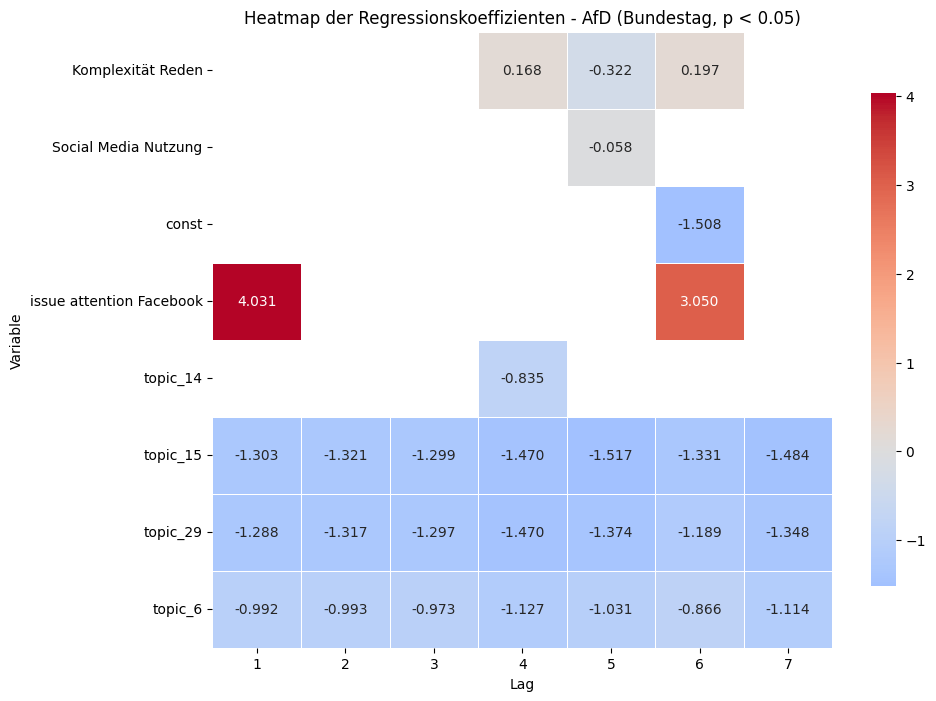

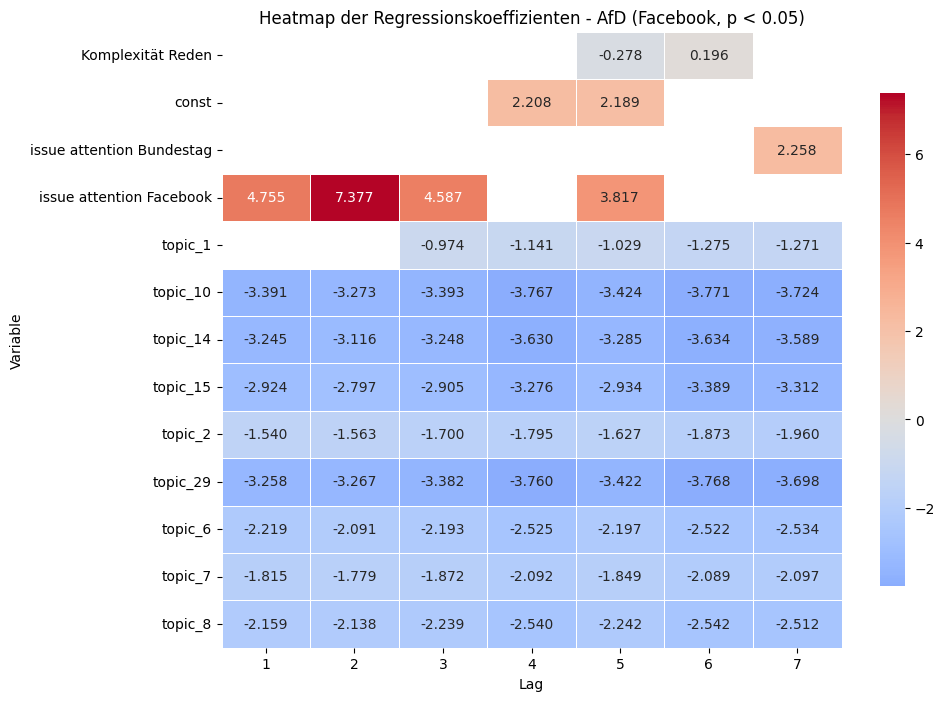

In [87]:
# Heatmap für Bundestag
plot_single_heatmap(df_afd, "Bundestag", "Heatmap der Regressionskoeffizienten - AfD (Bundestag, p < 0.05)")

# Heatmap für Facebook
plot_single_heatmap(df_afd, "Facebook", "Heatmap der Regressionskoeffizienten - AfD (Facebook, p < 0.05)")

In [20]:
df_cdu = pd.read_csv('regression tables/CDU/master_regression_results_cdu_fixed.csv', sep=';')


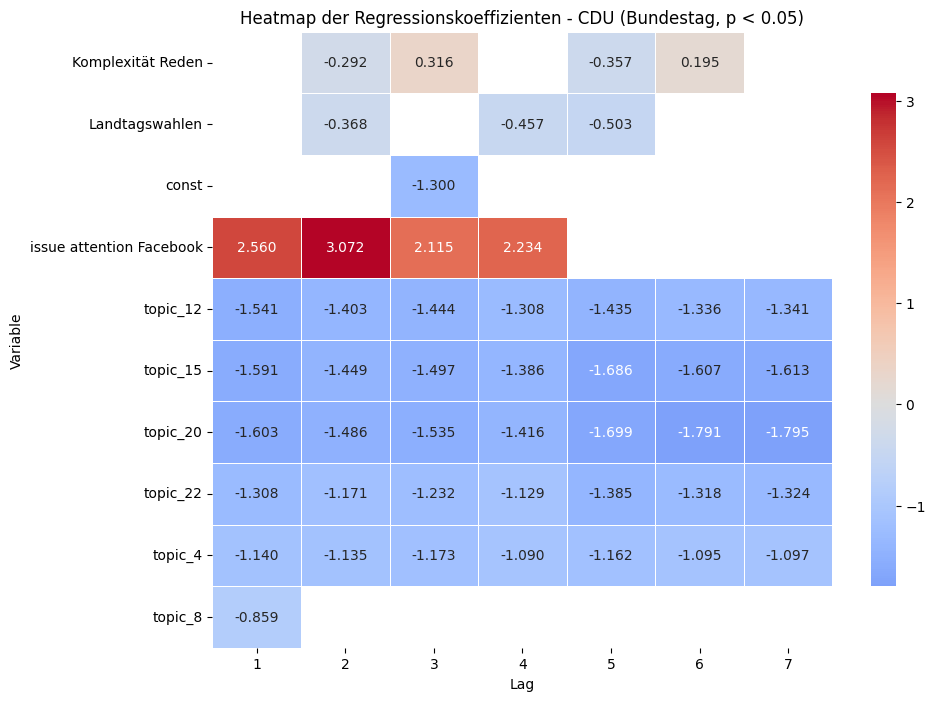

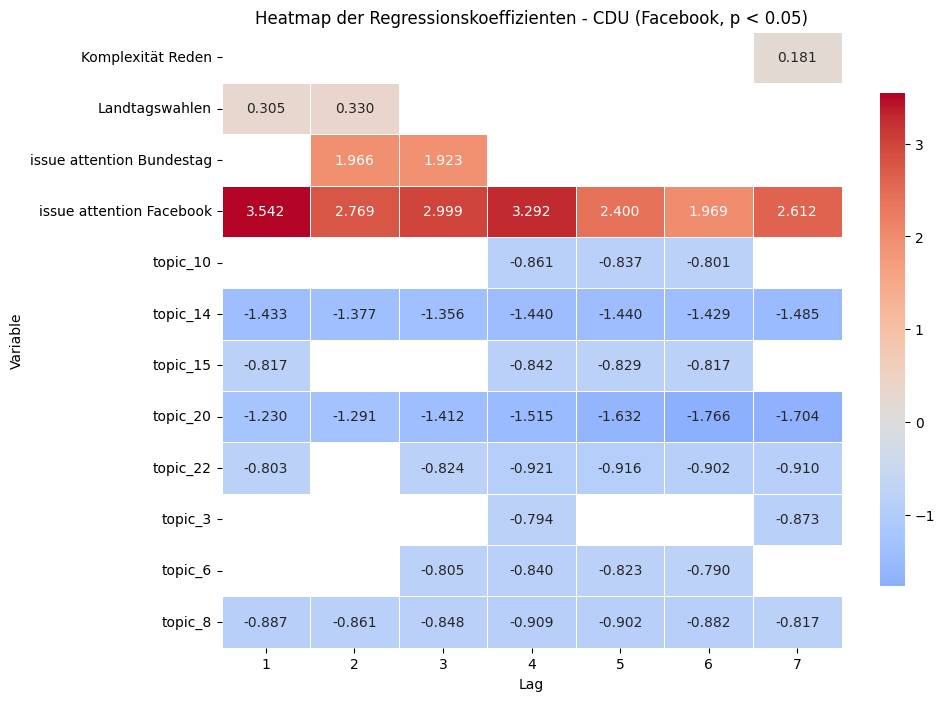

In [88]:
# Heatmap für Bundestag
plot_single_heatmap(df_cdu, "Bundestag", "Heatmap der Regressionskoeffizienten - CDU (Bundestag, p < 0.05)")

# Heatmap für Facebook
plot_single_heatmap(df_cdu, "Facebook", "Heatmap der Regressionskoeffizienten - CDU (Facebook, p < 0.05)")

In [45]:
df_agg = pd.read_csv("regression tables\master_regression_results_agg_significant.csv", sep=';')
df_agg

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\pturl\AppData\Local\Temp\ipykernel_36168\1491165546.py:1: SyntaxWarning: invalid escape sequence '\m'
  df_agg = pd.read_csv("regression tables\master_regression_results_agg_significant.csv", sep=';')


,Lag,Model,Variable,Coefficient,signifikanz
0,1,Facebook,const,2.964,0.01
1,1,Facebook,const,2.964,0.05
2,1,Facebook,const,2.964,0.10
3,1,Bundestag,issue attention Bundestag,-1.693,0.10
4,1,Bundestag,issue attention Facebook,7.826,0.01
...,...,...,...,...,...
1311,7,Facebook,topic_8,-2.401,0.01
1312,7,Bundestag,topic_8,-1.003,0.05
1313,7,Facebook,topic_8,-2.401,0.05
1314,7,Bundestag,topic_8,-1.003,0.10


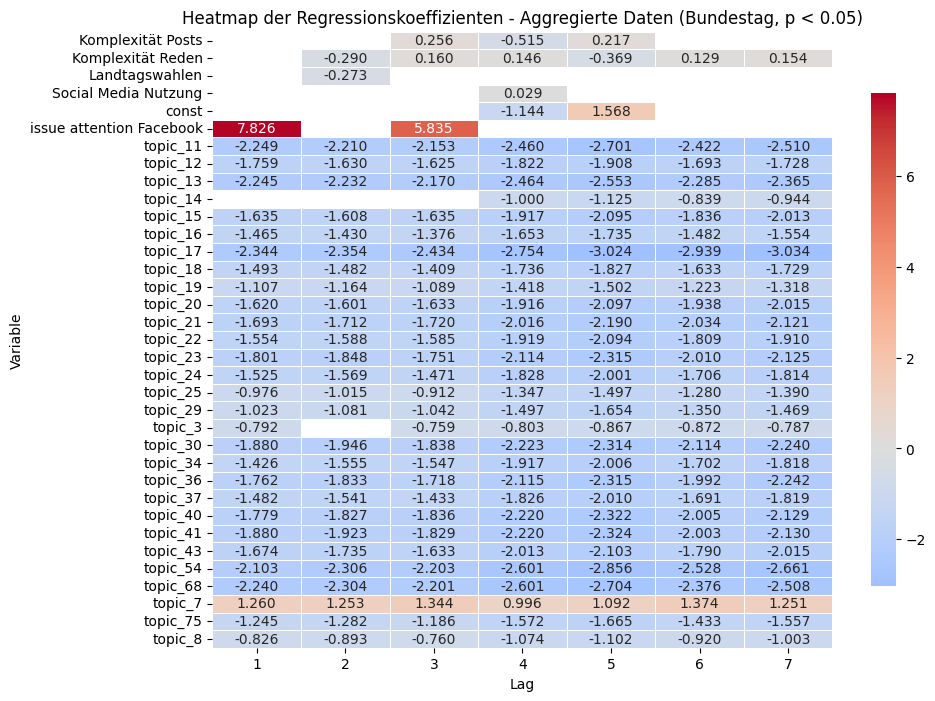

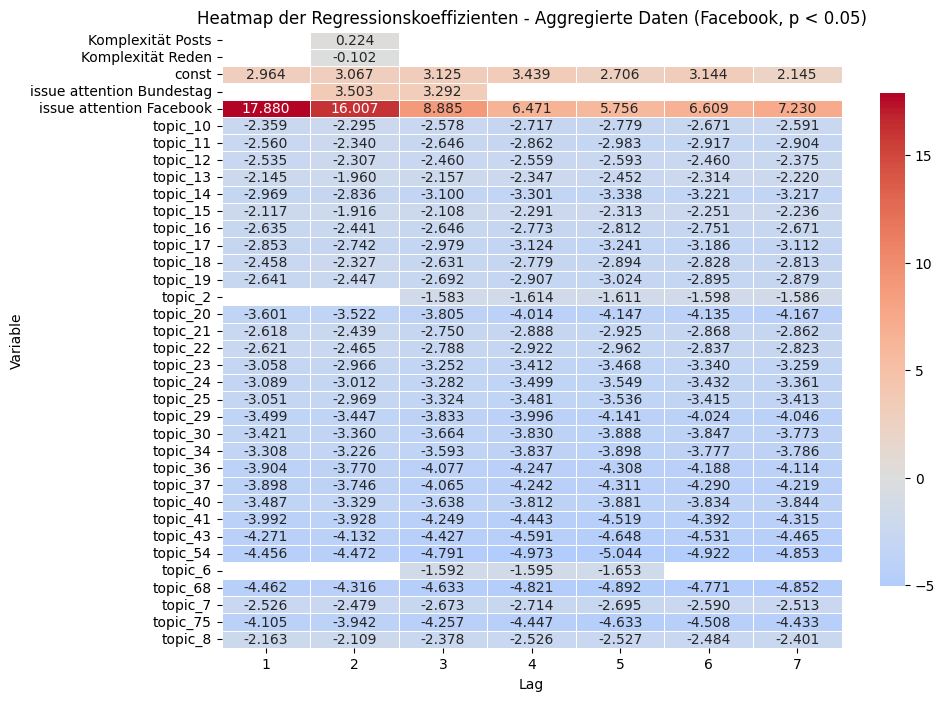

In [89]:
# Heatmap für Bundestag
plot_single_heatmap(df_agg, "Bundestag", "Heatmap der Regressionskoeffizienten - Aggregierte Daten (Bundestag, p < 0.05)")

# Heatmap für Facebook
plot_single_heatmap(df_agg, "Facebook", "Heatmap der Regressionskoeffizienten - Aggregierte Daten (Facebook, p < 0.05)")

In [47]:
df_linke = pd.read_csv('regression tables/LINKE/master_regression_results_linke.csv', sep=';')


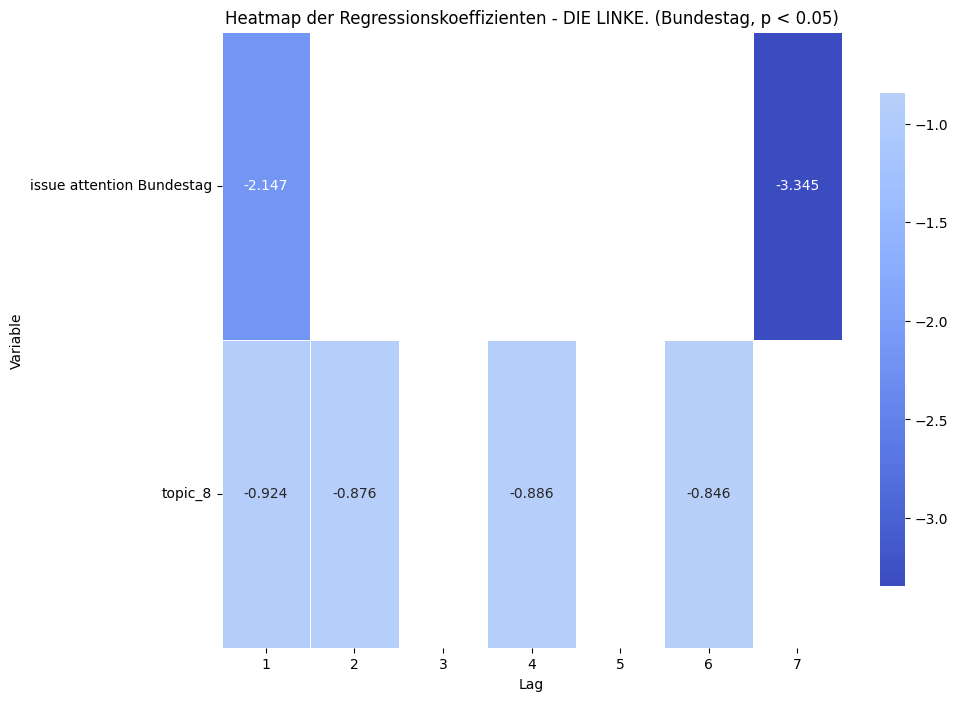

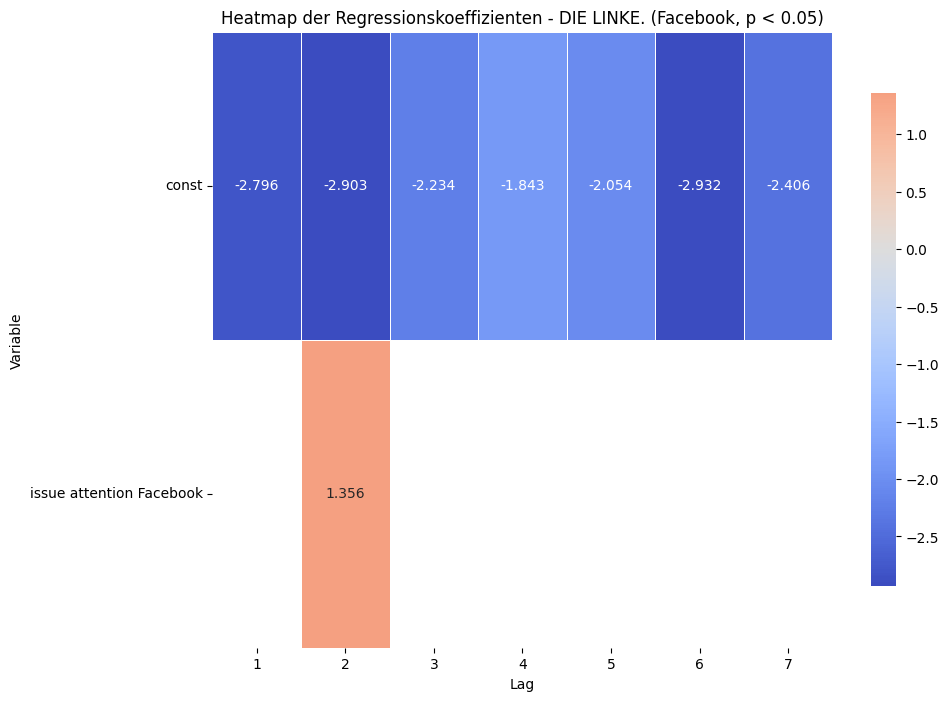

In [95]:
# Heatmap für Bundestag
plot_single_heatmap(df_linke, "Bundestag", "Heatmap der Regressionskoeffizienten - DIE LINKE. (Bundestag, p < 0.05)")

# Heatmap für Facebook
plot_single_heatmap(df_linke, "Facebook", "Heatmap der Regressionskoeffizienten - DIE LINKE. (Facebook, p < 0.05)")

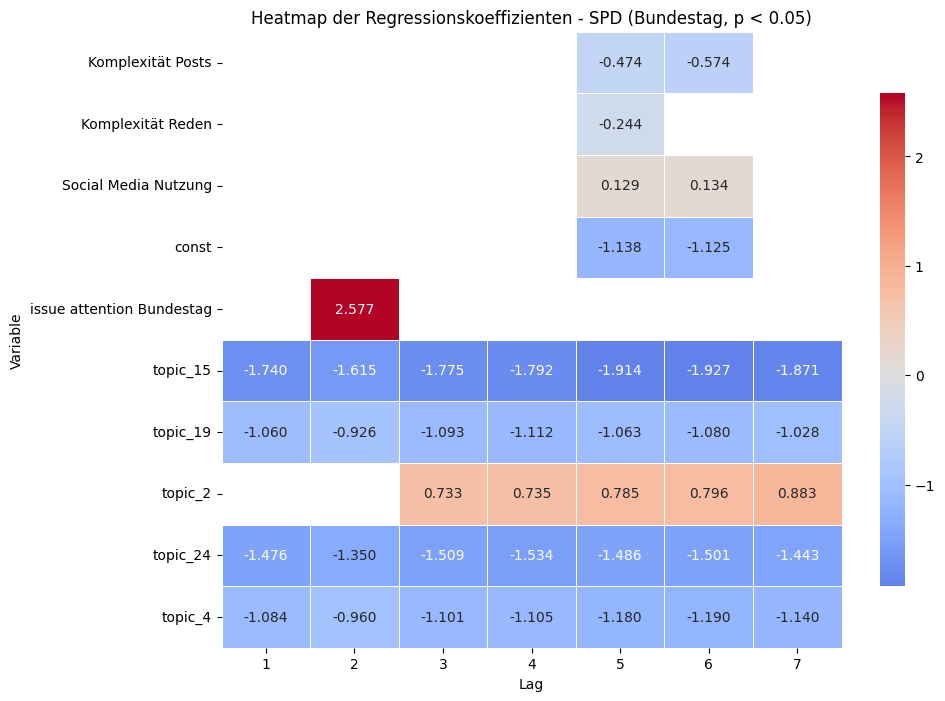

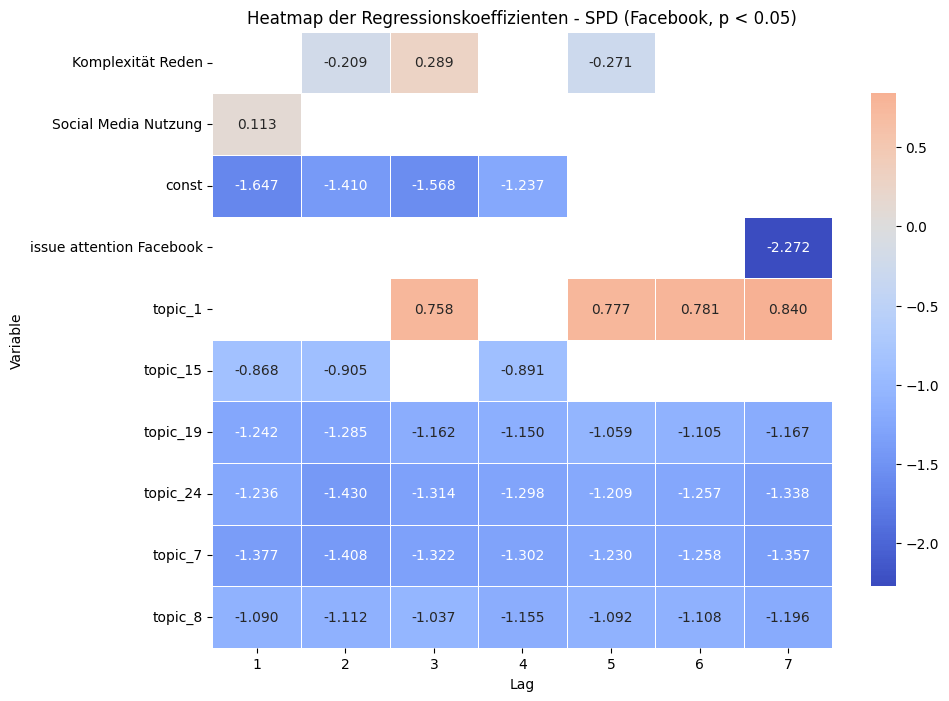

In [91]:
df_spd = pd.read_csv('regression tables/SPD/master_regression_results_spd.csv', sep=';')

# Heatmap für Bundestag
plot_single_heatmap(df_spd, "Bundestag", "Heatmap der Regressionskoeffizienten - SPD (Bundestag, p < 0.05)")

# Heatmap für Facebook
plot_single_heatmap(df_spd, "Facebook", "Heatmap der Regressionskoeffizienten - SPD (Facebook, p < 0.05)")

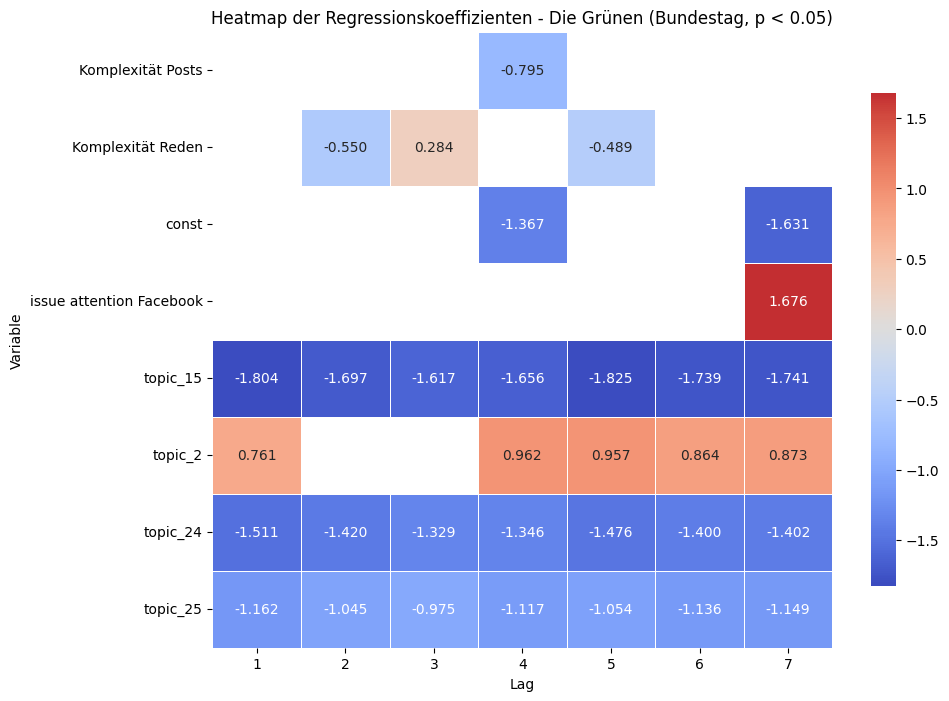

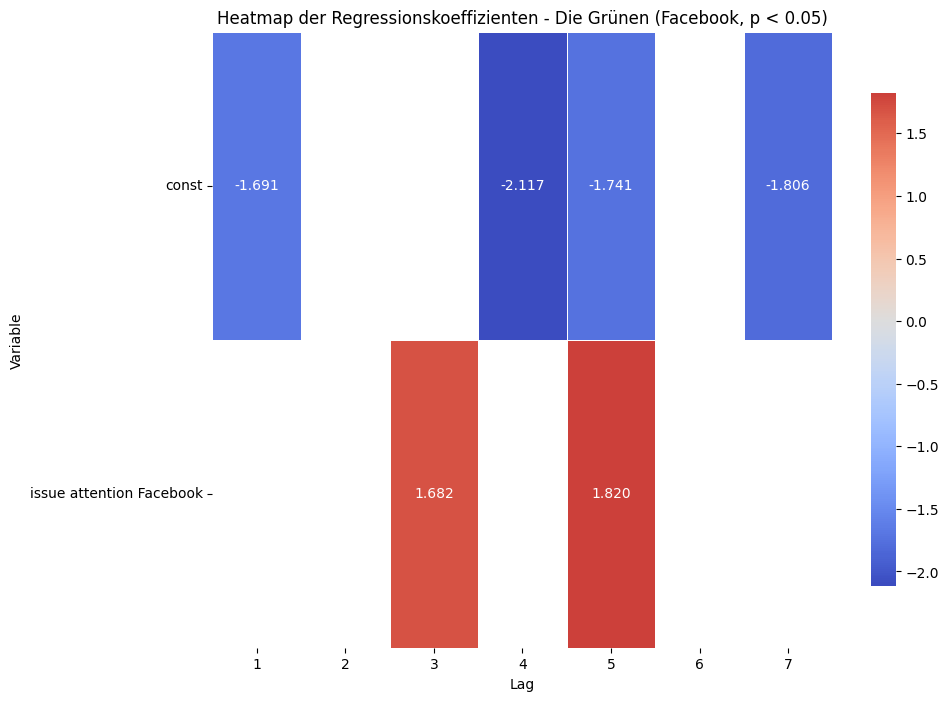

In [92]:
df_gruen = pd.read_csv('regression tables/GRUENE/master_regression_results_gruen.csv', sep=';')

# Heatmap für Bundestag
plot_single_heatmap(df_gruen, "Bundestag", "Heatmap der Regressionskoeffizienten - Die Grünen (Bundestag, p < 0.05)")

# Heatmap für Facebook
plot_single_heatmap(df_gruen, "Facebook", "Heatmap der Regressionskoeffizienten - Die Grünen (Facebook, p < 0.05)")

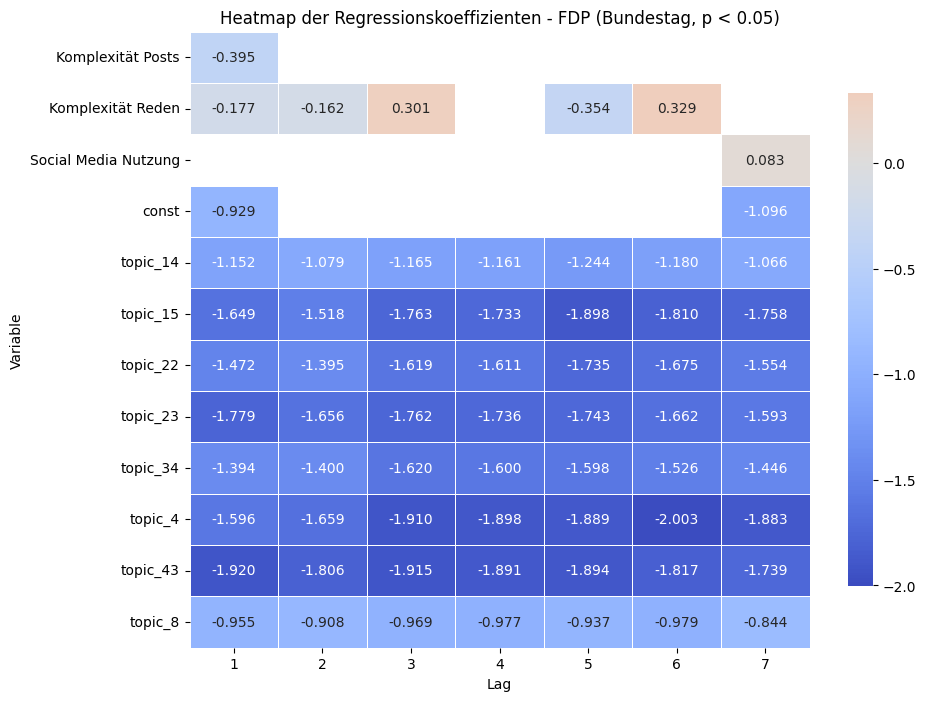

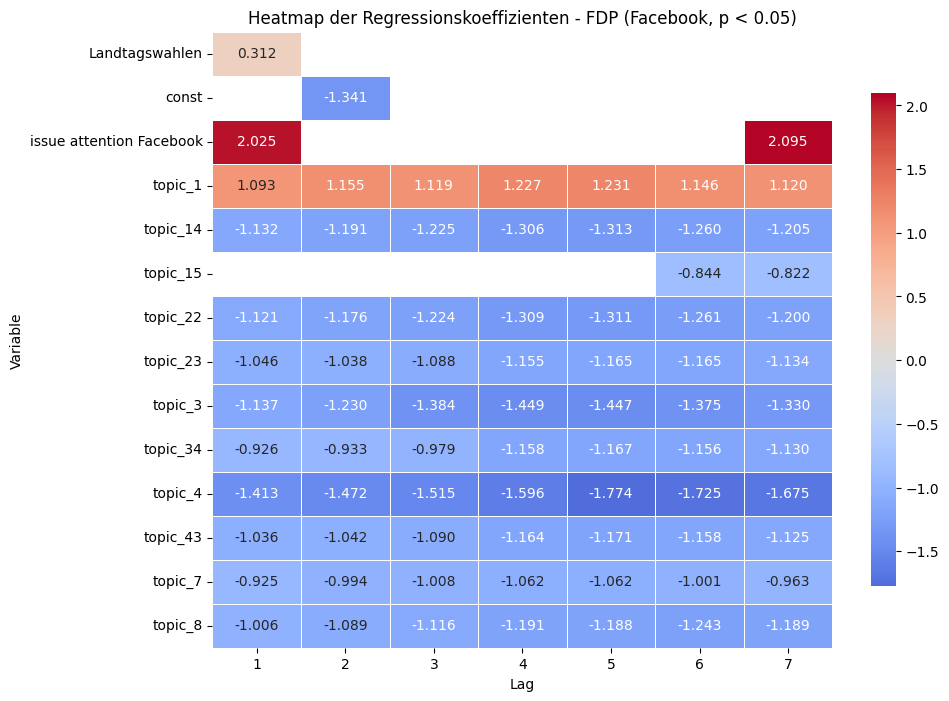

In [93]:
df_fdp = pd.read_csv('regression tables/FDP/master_regression_results_fdp.csv', sep=';')

# Heatmap für Bundestag
plot_single_heatmap(df_fdp, "Bundestag", "Heatmap der Regressionskoeffizienten - FDP (Bundestag, p < 0.05)")

# Heatmap für Facebook
plot_single_heatmap(df_fdp, "Facebook", "Heatmap der Regressionskoeffizienten - FDP (Facebook, p < 0.05)")